In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

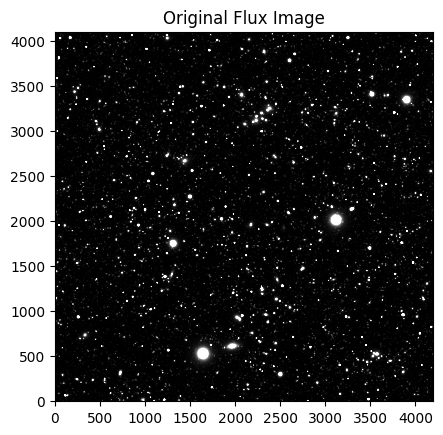

In [2]:
flux_image_hdul = fits.open("retrieved_fits/image9_i_62_-38.fits")
flux_image = flux_image_hdul[1].data
plt.imshow(flux_image,vmin=0,vmax=1,cmap='gray', origin='lower');
plt.title("Original Flux Image");

hdul = fits.open("sersic_output/labelled_segmap9.fits")
background = np.zeros(hdul[1].data.shape)
onion_img = [sum(x) for x in zip(hdul[1].data,hdul[2].data,hdul[3].data,hdul[4].data,background)]

In [10]:
print(len(data_list[-1]))

4100


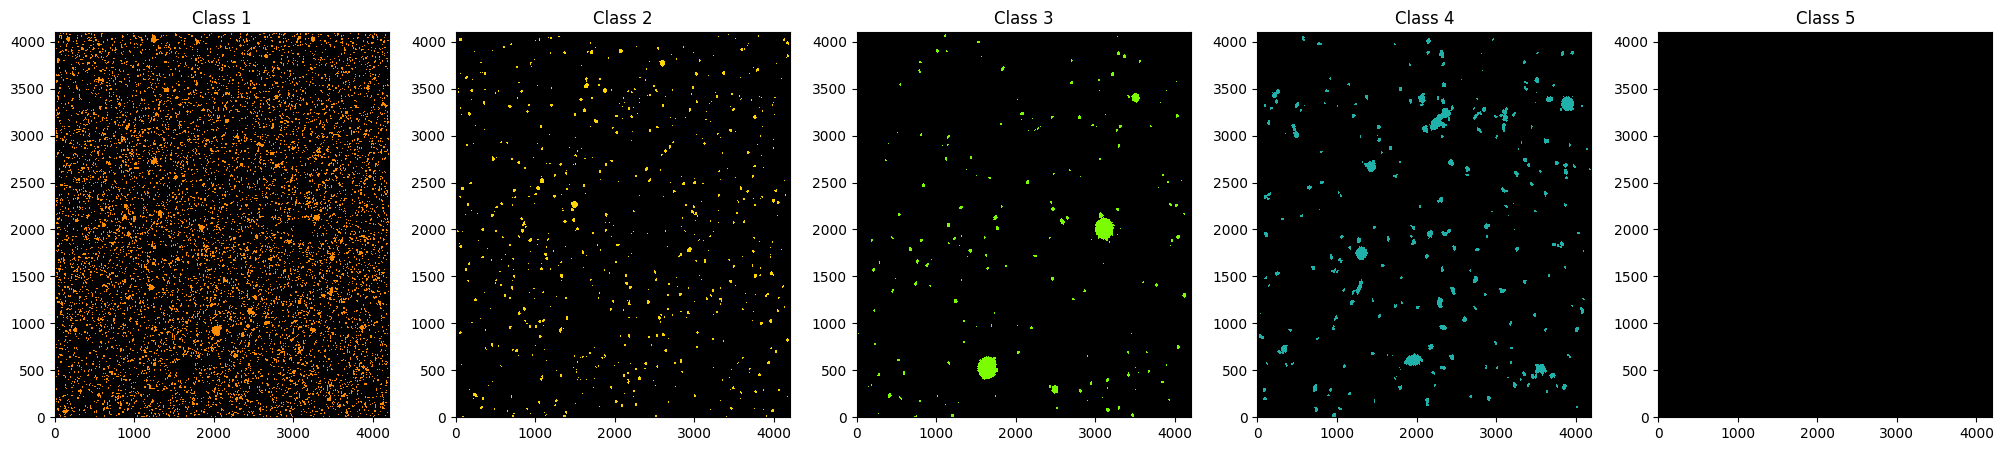

In [3]:
hdul[5].data = background

data_list = [i.data for i in hdul[1:]]      
        
cmaps = [ListedColormap(["black","darkorange"]),ListedColormap(["black","gold"]),ListedColormap(["black","lawngreen"]),ListedColormap(["black","lightseagreen"]),ListedColormap(["black","red"])]
n = len(cmaps)

fig, axes = plt.subplots(1, n, figsize=(25,5))#, squeeze=False)     

count = 0
for [ax, cmap] in zip(axes.flat, cmaps):
    psm = ax.pcolormesh(data_list[count], cmap=cmap, vmin=0, vmax=count + 1) #  rasterized=True
    ax.title.set_text(f"Class {count+1}")
    count+=1
    
plt.show()
        

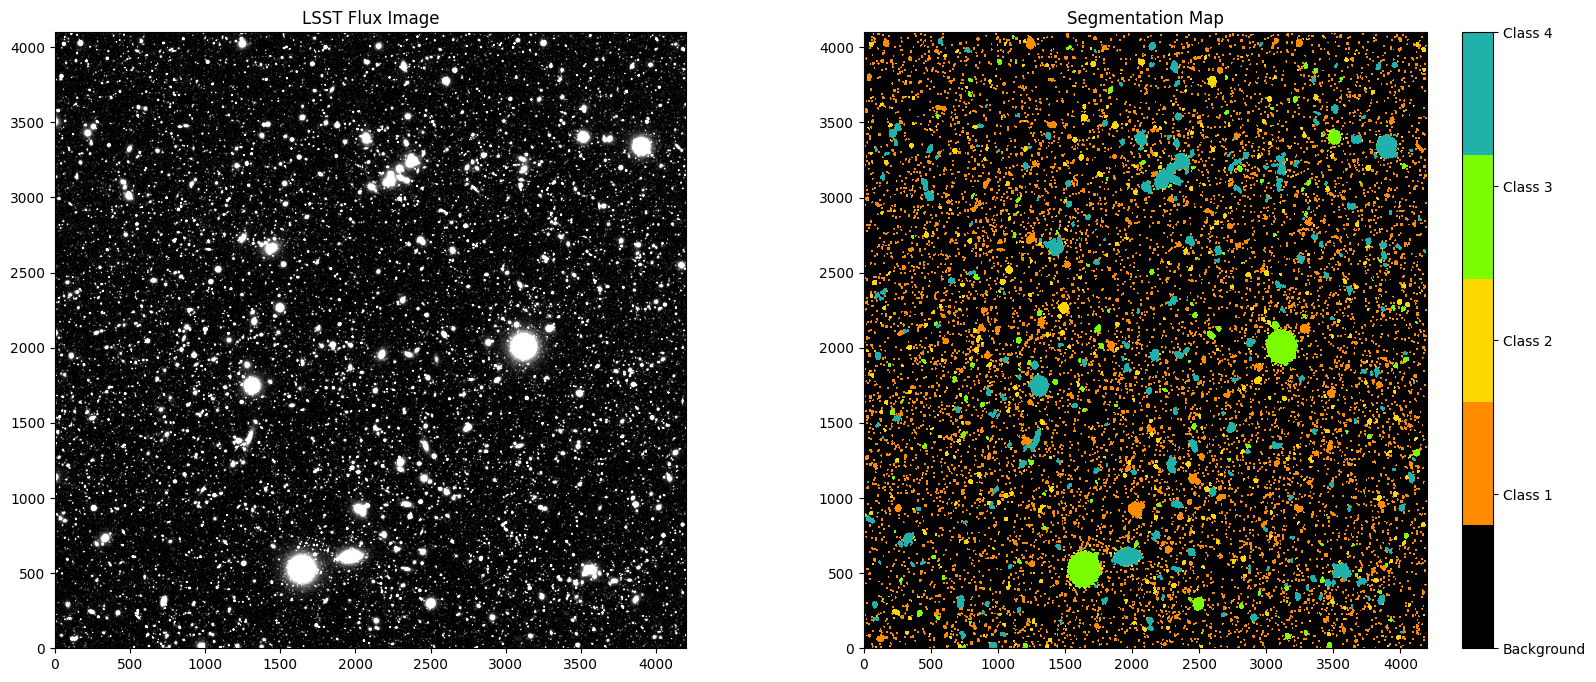

In [4]:
cmaps = [ListedColormap(["black","darkorange", "gold", "lawngreen", "lightseagreen"])]
data = onion_img 


n = len(cmaps) +1 
fig, axs = plt.subplots(1, n, figsize=(20,8))
axs[0].imshow(flux_image,vmin=0,vmax=0.2,cmap='gray', origin='lower');
axs[0].title.set_text("LSST Flux Image")

for [ax, cmap] in zip(axs[1:].flat, cmaps):
    psm = ax.pcolormesh(data, cmap=cmap, vmin=0, vmax=4)
    cbar = fig.colorbar(psm, ax=ax, ticks=[0,1,2,3,4])
    cbar.ax.set_yticklabels(['Background','Class 1', 'Class 2', 'Class 3', 'Class 4'])
    ax.title.set_text("Segmentation Map")
plt.show()


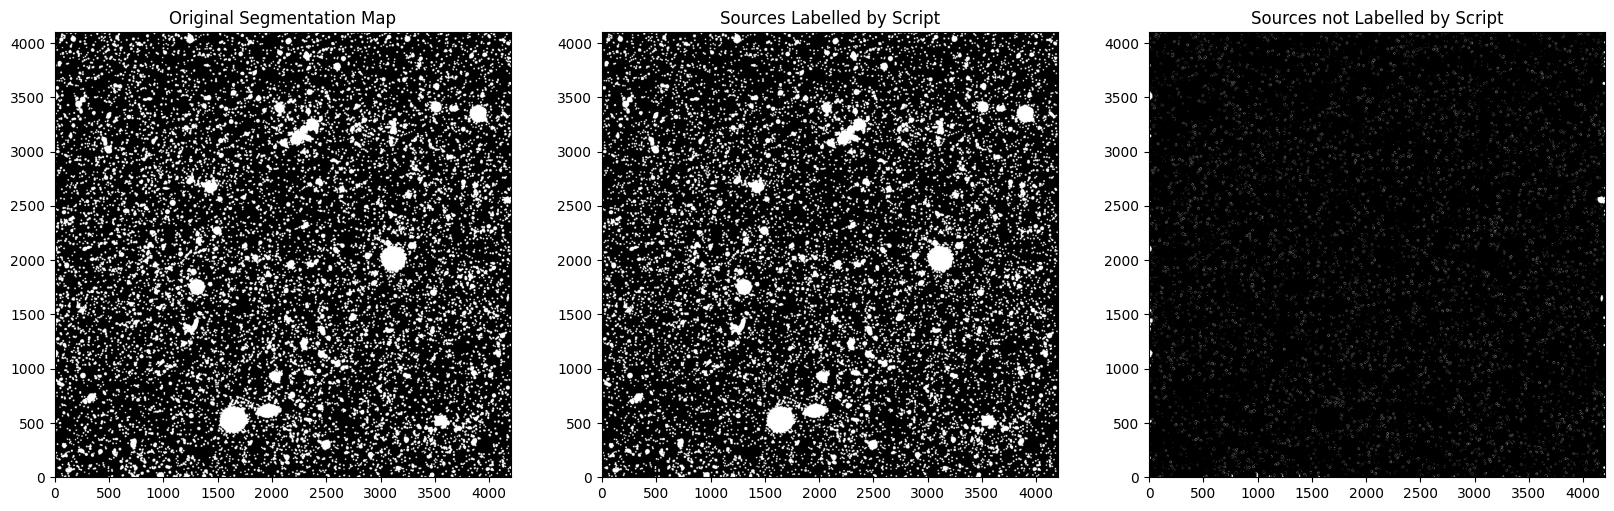

In [5]:
segmentation_map = np.load('sersic_output/seg9.npy')
segmap = np.array(segmentation_map.data)
segmap[segmap > 0] = 1

fig, axes = plt.subplots(1,3,figsize=(20,20))

axes[0].imshow(segmap,cmap='gray', origin='lower',vmin=0, vmax=1)
axes[0].title.set_text("Original Segmentation Map")
# resizing all classes data to be one so they can be subtracted from segmap to see remainder of sources
class1,class2,class3,class4 = data_list[:-1]

class2[class2 > 0] = 1
class3[class3 > 0] = 1
class4[class4 > 0] = 1

labelled_sources = np.add(class1,class2)
labelled_sources = np.add(class3,labelled_sources)
labelled_sources = np.add(class4,labelled_sources)

axes[1].imshow(labelled_sources,cmap='gray', origin='lower', vmin=0, vmax=1)
axes[1].title.set_text("Sources Labelled by Script")

segmap = np.subtract(segmap, class1)
segmap = np.subtract(segmap, class2)
segmap = np.subtract(segmap, class3)
segmap = np.subtract(segmap, class4)

axes[2].imshow(segmap,cmap='gray', origin='lower', vmin=0, vmax=1)
axes[2].title.set_text("Sources not Labelled by Script")